# Plotting Running Times

/home/ubuntu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


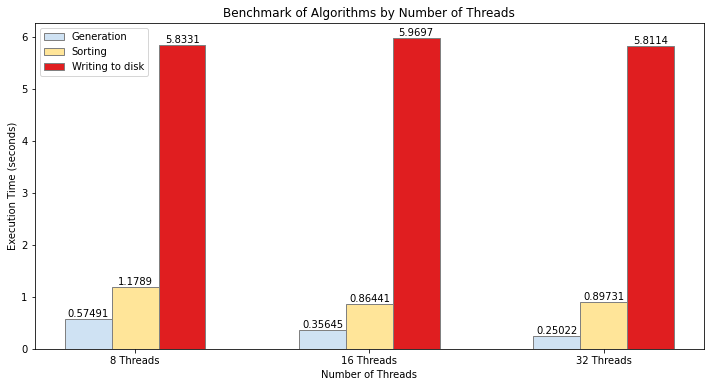

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
phases = ["Generation", "Sorting", "Writing to disk"]
threads = ["8 Threads", "16 Threads", "32 Threads"]

# Execution times for each phase with different number of threads
execution_times = {
    "Generation": [0.57491, 0.35645, 0.25022],
    "Sorting": [1.1789, 0.86441, 0.89731],
    "Writing to disk": [5.8331, 5.9697, 5.8114],
}

# Bar width
bar_width = 0.2

# X positions for the bars
r1 = np.arange(len(threads))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))

plt.bar(
    r1,
    execution_times["Generation"],
    color="#cfe2f3ff",
    width=bar_width,
    edgecolor="grey",
    label="Generation",
)
plt.bar(
    r2,
    execution_times["Sorting"],
    color="#ffe599ff",
    width=bar_width,
    edgecolor="grey",
    label="Sorting",
)
plt.bar(
    r3,
    execution_times["Writing to disk"],
    color="#e01e20",
    width=bar_width,
    edgecolor="grey",
    label="Writing to disk",
)

# Add labels and title
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (seconds)")
plt.title("Benchmark of Algorithms by Number of Threads")
plt.xticks([r + bar_width for r in range(len(threads))], threads)

# Add data labels on top of bars
for i in range(len(threads)):
    plt.text(
        r1[i],
        execution_times["Generation"][i] + 0.01,
        str(execution_times["Generation"][i]),
        ha="center",
        va="bottom",
    )
    plt.text(
        r2[i],
        execution_times["Sorting"][i] + 0.01,
        str(execution_times["Sorting"][i]),
        ha="center",
        va="bottom",
    )
    plt.text(
        r3[i],
        execution_times["Writing to disk"][i] + 0.01,
        str(execution_times["Writing to disk"][i]),
        ha="center",
        va="bottom",
    )

# Add legend
plt.legend()

# Display the plot
plt.show()


# Plotting System Stats

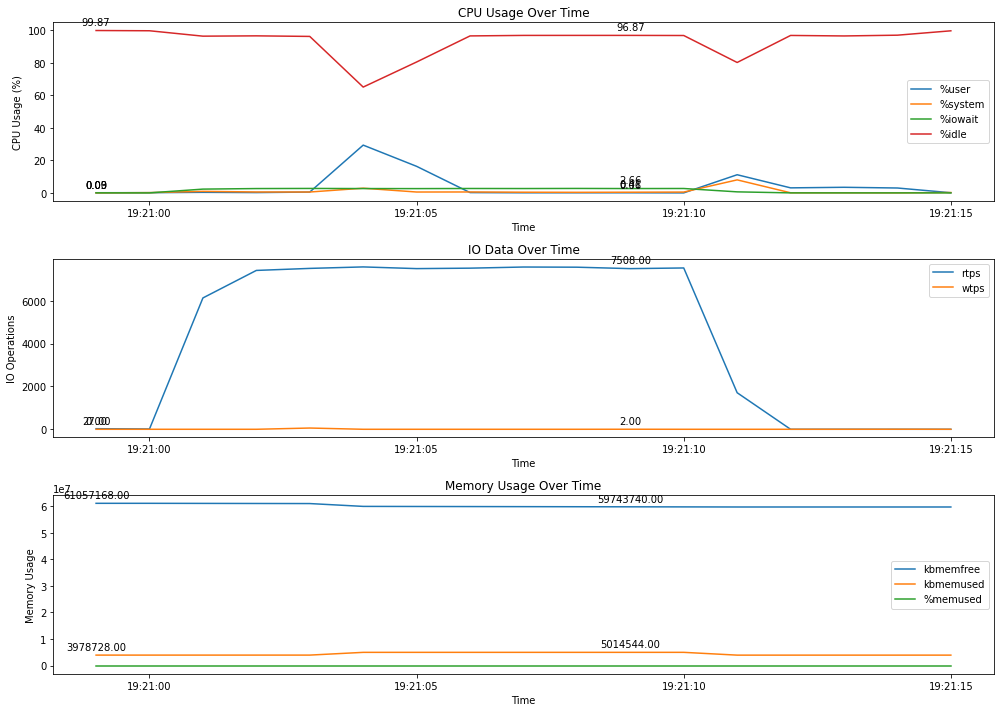

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt


def parse_cpu_data(file_path):
    cpu_data = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines[3:]:
            parts = line.split()
            if len(parts) == 8:  # Ensure there are 9 columns
                Time, cpu, user, nice, system, iowait, steal, idle = parts
                cpu_data.append(
                    [
                        Time,
                        cpu,
                        float(user),
                        float(nice),
                        float(system),
                        float(iowait),
                        float(steal),
                        float(idle),
                    ]
                )
    cpu_df = pd.DataFrame(
        cpu_data,
        columns=[
            "Time",
            "CPU",
            "%user",
            "%nice",
            "%system",
            "%iowait",
            "%steal",
            "%idle",
        ],
    )
    return cpu_df


def parse_io_data(file_path):
    io_data = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines[3:]:  # Skipping the first 3 lines (header information)
            parts = line.split()
            if len(parts) == 8:  # Ensure there are 8 columns
                Time, tps, rtps, wtps, dtps, bread, bwrtn, bdscd = parts
                io_data.append(
                    [
                        Time,
                        float(tps),
                        float(rtps),
                        float(wtps),
                        float(dtps),
                        float(bread),
                        float(bwrtn),
                        float(bdscd),
                    ]
                )
    io_df = pd.DataFrame(
        io_data,
        columns=[
            "Time",
            "tps",
            "rtps",
            "wtps",
            "dtps",
            "bread/s",
            "bwrtn/s",
            "bdscd/s",
        ],
    )
    return io_df


def parse_memory_data(file_path):
    memory_data = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines[3:]:  # Skipping the first 3 lines (header information)
            parts = line.split()
            if len(parts) == 12:  # Ensure there are 12 columns
                (
                    Time,
                    kbmemfree,
                    kbavail,
                    kbmemused,
                    memused,
                    kbbuffers,
                    kbcached,
                    kbcommit,
                    commit,
                    kbactive,
                    kbinact,
                    kbdirty,
                ) = parts
                memory_data.append(
                    [
                        Time,
                        float(kbmemfree),
                        float(kbavail),
                        float(kbmemused),
                        float(memused),
                        float(kbbuffers),
                        float(kbcached),
                        float(kbcommit),
                        float(commit),
                        float(kbactive),
                        float(kbinact),
                        float(kbdirty),
                    ]
                )
    memory_df = pd.DataFrame(
        memory_data,
        columns=[
            "Time",
            "kbmemfree",
            "kbavail",
            "kbmemused",
            "%memused",
            "kbbuffers",
            "kbcached",
            "kbcommit",
            "%commit",
            "kbactive",
            "kbinact",
            "kbdirty",
        ],
    )
    return memory_df


cpu_file = "stats/cpu/cpu-stats_2516.txt"
io_file = "stats/io/io-stats_2516.txt"
memory_file = "stats/memory/memory-stats_2516.txt"

cpu_df = parse_cpu_data(cpu_file)
io_df = parse_io_data(io_file)
memory_df = parse_memory_data(memory_file)

# Convert 'Time' columns to datetime for easier merging and plotting
cpu_df["Time"] = pd.to_datetime(cpu_df["Time"], format="%H:%M:%S")
io_df["Time"] = pd.to_datetime(io_df["Time"], format="%H:%M:%S")
memory_df["Time"] = pd.to_datetime(memory_df["Time"], format="%H:%M:%S")

# Merge dataframes on 'Time'
merged_df = cpu_df.merge(io_df, on="Time", how="outer").merge(
    memory_df, on="Time", how="outer"
)

# Plot the data
plt.figure(figsize=(14, 10))


# CPU Usage Plot
plt.subplot(3, 1, 1)
plt.plot(cpu_df["Time"], cpu_df["%user"], label="%user")
plt.plot(cpu_df["Time"], cpu_df["%system"], label="%system")
plt.plot(cpu_df["Time"], cpu_df["%iowait"], label="%iowait")
plt.plot(cpu_df["Time"], cpu_df["%idle"], label="%idle")
for i in range(0, len(cpu_df), 10):
    plt.annotate(
        f"{cpu_df['%user'][i]:.2f}",
        (cpu_df["Time"][i], cpu_df["%user"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{cpu_df['%system'][i]:.2f}",
        (cpu_df["Time"][i], cpu_df["%system"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{cpu_df['%iowait'][i]:.2f}",
        (cpu_df["Time"][i], cpu_df["%iowait"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{cpu_df['%idle'][i]:.2f}",
        (cpu_df["Time"][i], cpu_df["%idle"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
plt.xlabel("Time")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage Over Time")
plt.legend()

# IO Data Plot
plt.subplot(3, 1, 2)
plt.plot(io_df["Time"], io_df["rtps"], label="rtps")
plt.plot(io_df["Time"], io_df["wtps"], label="wtps")
for i in range(0, len(io_df), 10):
    plt.annotate(
        f"{io_df['rtps'][i]:.2f}",
        (io_df["Time"][i], io_df["rtps"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{io_df['wtps'][i]:.2f}",
        (io_df["Time"][i], io_df["wtps"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )

plt.xlabel("Time")
plt.ylabel("IO Operations")
plt.title("IO Data Over Time")
plt.legend()

# Memory Usage Plot
plt.subplot(3, 1, 3)
plt.plot(memory_df["Time"], memory_df["kbmemfree"], label="kbmemfree")
plt.plot(memory_df["Time"], memory_df["kbmemused"], label="kbmemused")
plt.plot(memory_df["Time"], memory_df["%memused"], label="%memused")
for i in range(0, len(memory_df), 10):
    plt.annotate(
        f"{memory_df['kbmemfree'][i]:.2f}",
        (memory_df["Time"][i], memory_df["kbmemfree"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{memory_df['kbmemused'][i]:.2f}",
        (memory_df["Time"][i], memory_df["kbmemused"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    # plt.annotate(
    #     f"{memory_df['%memused'][i]:.2f}",
    #     (memory_df["Time"][i], memory_df["%memused"][i]),
    #     textcoords="offset points",
    #     xytext=(0, 5),
    #     ha="center",
    # )

plt.xlabel("Time")
plt.ylabel("Memory Usage")
plt.title("Memory Usage Over Time")
plt.legend()

plt.tight_layout()
plt.show()

# Checking current directory
and changing current directory

In [3]:
import os 

current_directory = os.getcwd()
print(current_directory)

os.chdir("/home/ubuntu/projects/vault-76/entrance")
current_directory = os.getcwd()
print(f"Changed directory to {current_directory}")

/home/ubuntu/projects/vault-76
Changed directory to /home/ubuntu/projects/vault-76/entrance


# Benchmarking lookup process
1. Runs "vault-76/entrance/src/benchmark/generate_once.sh" script 
    - Cleans "output" folder
    - Cleans cache 
    - Runs ./target/release/entrance -k 29 -t 16 - Generates, sorts, and writes to disk 2^29 records with 16 threads 
    - All the generated hashes are written to "vault-76/entrance/output" folder
2. Creates "vault-76/entrance/output/lookup_duration.csv" file with headers: "Hash" and "Total Duration (ms)"
3. Repeats lookup process 1000 times
    - Each run has a corresponding seed, so each time this script will be run, the hashes will be the same. 
4. Runs "vault-76/entrance/src/benchmark/generate_once.sh" script 
    - Cleans cache 
    - Runs ./target/release/entrance -x /hash/ - Searches for the specified hash
    - Prints out the time it took to find the hash
5. Writes /hash/ and /time/ to csv_file 
6. Zips output folder and saves to "vault-76/"

## Generate block
Run below cell first and only once. It will populate output folder with record files and we can use the same record files each time. 

Before running, make sure that in generate_once.sh script, line `cd ../..` is commented out. If not, it will make the current directory of this jupyter notebook to be projects instead of entrance. 

Also, you might need to commend out `sar` lines from the script. 

In [201]:
import subprocess 

generate_script = "src/benchmark/generate_once.sh"

# Start Hash generation script 
try: 
    result = subprocess.run([generate_script, "29", "16"], capture_output=True, text=True, check=True)
    print("---------------------Hash Generation, Sorting, Writing...---------------------")
    print(result.stdout)
#     print("Hash generation error (if any):")
#     print(result.stderr)
except subprocess.CalledProcessError as e:
    print(f"Error executing hash generation script: {e}")
    print(e.stderr)

---------------------Hash Generation, Sorting, Writing...---------------------
Cleaning the output directory...
The total size of all files is 



## CSV file block
If you want to rerun lookup block, make sure to rerun CSV file block first. Otherwise, it will just continue appending values to the csv file created during previous run. 

In [198]:
import csv

csv_file = "output/lookup_durations.csv"

# Write the headers to the CSV file
try:
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Hash", "Total Duration (ms)"])
    print(f"{csv_file} successfully opened and wrote headers")
except Exception as e: 
    print(f"Exception occurred: {e}")

output/lookup_durations.csv successfully opened and wrote headers


## Lookup block

In [199]:
import os
import random

bash_script = "src/benchmark/lookup.sh"    
        
# Start hash lookup script 
for i in range(1000):
    random.seed(i)
    hash_len = random.randint(1, 5)
    hash_bits = random.getrandbits(hash_len * 8)  # length in bytes * 8 bits per byte
    hash = f'{hash_bits:0{hash_len * 2}x}'  # convert to hex and pad with zeros if needed
#     print(f"Generated hash {hash}")
    
    try: 
        result = subprocess.run([bash_script, hash], capture_output=True, text=True, check=True)
        print(f"---------------------({i}/1000) Lookup with {hash}---------------------")
        print(result.stdout)
        
        # Write to csv file the time it took to lookup for the hash
        total_duration = None 
        for line in result.stdout.splitlines():
            if "Total duration: " in line:
                total_duration = line.split(":")[1].strip()
                break

        if total_duration is not None:
            try: 
                with open(csv_file, mode='a', newline='') as file:
                    writer = csv.writer(file)
                    writer.writerow([hash, total_duration])
                print(f"New hash and time is successfully added to csv_file: {hash}, {total_duration}")
                print()
            except Exception as e:
                print(f"Exception occurred: {e}")
        else:
            print("total_duration variable does not exist or is None")
            
    except subprocess.CalledProcessError as e:
        print(f"Error executing bash script: {e}")
        print("Bash script error output:")
        print(e.stderr)

---------------------Lookup with c2094cac---------------------
Hash passed to script: c2094cac
Clearing cache...
Running the command...
Found records: None
Looking up c2094cac hash took 11.060881ms
Total duration: 11.060881


New hash and time is successfully added to csv_file: c2094cac, 11.060881

---------------------Lookup with 91b7---------------------
Hash passed to script: 91b7
Clearing cache...
Running the command...
Binary search took: 8.33108ms
Found records: Some(Record { nonce: [182, 37, 134, 255, 231, 204], hash: [145, 183, 153, 11, 21, 11, 26, 25, 190, 215, 27, 199, 57, 52, 227, 152, 195, 171, 80, 120, 2, 11, 89, 145, 205, 126] })
Looking up 91b7 hash took 8.970201ms
Total duration: 8.970201


New hash and time is successfully added to csv_file: 91b7, 8.970201

---------------------Lookup with 17---------------------
Hash passed to script: 17
Clearing cache...
Running the command...
Binary search took: 1.005899ms
Found records: Some(Record { nonce: [105, 154, 30, 48, 33, 8

---------------------Lookup with 4284---------------------
Hash passed to script: 4284
Clearing cache...
Running the command...
Binary search took: 10.340097ms
Found records: Some(Record { nonce: [226, 4, 31, 251, 230, 89], hash: [66, 132, 17, 7, 167, 66, 217, 151, 28, 163, 124, 203, 44, 153, 26, 22, 45, 56, 143, 143, 206, 228, 178, 100, 245, 246] })
Looking up 4284 hash took 11.145356ms
Total duration: 11.145356


New hash and time is successfully added to csv_file: 4284, 11.145356

---------------------Lookup with 6b01---------------------
Hash passed to script: 6b01
Clearing cache...
Running the command...
Binary search took: 10.091502ms
Found records: Some(Record { nonce: [152, 233, 64, 196, 90, 209], hash: [107, 1, 156, 76, 203, 99, 98, 125, 152, 107, 30, 200, 19, 5, 195, 132, 77, 168, 243, 117, 149, 102, 28, 25, 99, 90] })
Looking up 6b01 hash took 10.55536ms
Total duration: 10.55536


New hash and time is successfully added to csv_file: 6b01, 10.55536

---------------------Looku

---------------------Lookup with 550caef9---------------------
Hash passed to script: 550caef9
Clearing cache...
Running the command...
Found records: None
Looking up 550caef9 hash took 12.128967ms
Total duration: 12.128967


New hash and time is successfully added to csv_file: 550caef9, 12.128967

---------------------Lookup with 06---------------------
Hash passed to script: 06
Clearing cache...
Running the command...
Binary search took: 2.700664ms
Found records: Some(Record { nonce: [44, 176, 46, 154, 254, 1], hash: [6, 255, 209, 94, 149, 124, 243, 37, 163, 170, 120, 102, 255, 241, 12, 39, 157, 46, 225, 65, 36, 130, 57, 227, 226, 12] })
Looking up 06 hash took 4.168372ms
Total duration: 4.168372


New hash and time is successfully added to csv_file: 06, 4.168372

---------------------Lookup with 49---------------------
Hash passed to script: 49
Clearing cache...
Running the command...
Binary search took: 3.922474ms
Found records: Some(Record { nonce: [174, 236, 57, 7, 79, 86], hash:

---------------------Lookup with 2e843b2c---------------------
Hash passed to script: 2e843b2c
Clearing cache...
Running the command...
Found records: None
Looking up 2e843b2c hash took 12.899965ms
Total duration: 12.899965


New hash and time is successfully added to csv_file: 2e843b2c, 12.899965

---------------------Lookup with 102c4b7d89---------------------
Hash passed to script: 102c4b7d89
Clearing cache...
Running the command...
Found records: None
Looking up 102c4b7d89 hash took 10.722093ms
Total duration: 10.722093


New hash and time is successfully added to csv_file: 102c4b7d89, 10.722093

---------------------Lookup with 71b90163---------------------
Hash passed to script: 71b90163
Clearing cache...
Running the command...
Found records: None
Looking up 71b90163 hash took 11.921072ms
Total duration: 11.921072


New hash and time is successfully added to csv_file: 71b90163, 11.921072

---------------------Lookup with 1ff63c01---------------------
Hash passed to script: 1ff63c

---------------------Lookup with 74d6f18134---------------------
Hash passed to script: 74d6f18134
Clearing cache...
Running the command...
Found records: None
Looking up 74d6f18134 hash took 10.571888ms
Total duration: 10.571888


New hash and time is successfully added to csv_file: 74d6f18134, 10.571888

---------------------Lookup with c4f7---------------------
Hash passed to script: c4f7
Clearing cache...
Running the command...
Binary search took: 9.219819ms
Found records: Some(Record { nonce: [252, 113, 98, 0, 53, 191], hash: [196, 247, 82, 104, 131, 4, 134, 199, 99, 53, 8, 233, 14, 23, 22, 191, 197, 205, 253, 44, 38, 66, 160, 69, 182, 141] })
Looking up c4f7 hash took 10.000271ms
Total duration: 10.000271


New hash and time is successfully added to csv_file: c4f7, 10.000271

---------------------Lookup with d802db89---------------------
Hash passed to script: d802db89
Clearing cache...
Running the command...
Binary search took: 12.320955ms
Found records: Some(Record { nonce: [63

---------------------Lookup with 31d8dcb35f---------------------
Hash passed to script: 31d8dcb35f
Clearing cache...
Running the command...
Found records: None
Looking up 31d8dcb35f hash took 11.135192ms
Total duration: 11.135192


New hash and time is successfully added to csv_file: 31d8dcb35f, 11.135192

---------------------Lookup with ad21---------------------
Hash passed to script: ad21
Clearing cache...
Running the command...
Binary search took: 9.462582ms
Found records: Some(Record { nonce: [234, 235, 167, 151, 250, 36], hash: [173, 33, 206, 105, 196, 11, 12, 79, 143, 201, 138, 30, 60, 137, 37, 157, 224, 76, 253, 43, 185, 241, 109, 69, 214, 236] })
Looking up ad21 hash took 10.482381ms
Total duration: 10.482381


New hash and time is successfully added to csv_file: ad21, 10.482381

---------------------Lookup with ef2843ff---------------------
Hash passed to script: ef2843ff
Clearing cache...
Running the command...
Found records: None
Looking up ef2843ff hash took 12.121932ms
To

---------------------Lookup with 37---------------------
Hash passed to script: 37
Clearing cache...
Running the command...
Binary search took: 1.054055ms
Found records: Some(Record { nonce: [74, 47, 40, 119, 230, 226], hash: [55, 252, 98, 140, 242, 126, 101, 39, 105, 250, 6, 61, 48, 115, 1, 96, 85, 157, 94, 225, 216, 129, 77, 89, 254, 144] })
Looking up 37 hash took 1.447225ms
Total duration: 1.447225


New hash and time is successfully added to csv_file: 37, 1.447225

---------------------Lookup with 98368b43ae---------------------
Hash passed to script: 98368b43ae
Clearing cache...
Running the command...
Found records: None
Looking up 98368b43ae hash took 12.984322ms
Total duration: 12.984322


New hash and time is successfully added to csv_file: 98368b43ae, 12.984322

---------------------Lookup with 44---------------------
Hash passed to script: 44
Clearing cache...
Running the command...
Binary search took: 2.995442ms
Found records: Some(Record { nonce: [196, 174, 58, 34, 85, 193

---------------------Lookup with 07c7597597---------------------
Hash passed to script: 07c7597597
Clearing cache...
Running the command...
Found records: None
Looking up 07c7597597 hash took 9.05919ms
Total duration: 9.05919


New hash and time is successfully added to csv_file: 07c7597597, 9.05919

---------------------Lookup with aeb16d6aef---------------------
Hash passed to script: aeb16d6aef
Clearing cache...
Running the command...
Found records: None
Looking up aeb16d6aef hash took 12.278377ms
Total duration: 12.278377


New hash and time is successfully added to csv_file: aeb16d6aef, 12.278377

---------------------Lookup with d9f5---------------------
Hash passed to script: d9f5
Clearing cache...
Running the command...
Binary search took: 10.699681ms
Found records: Some(Record { nonce: [69, 107, 206, 51, 155, 208], hash: [217, 245, 154, 187, 219, 26, 98, 50, 243, 43, 137, 214, 233, 38, 58, 204, 235, 91, 67, 255, 115, 148, 130, 209, 63, 97] })
Looking up d9f5 hash took 11.61529

New hash and time is successfully added to csv_file: b0, 11.025171

---------------------Lookup with 759f0afd60---------------------
Hash passed to script: 759f0afd60
Clearing cache...
Running the command...
Found records: None
Looking up 759f0afd60 hash took 11.202025ms
Total duration: 11.202025


New hash and time is successfully added to csv_file: 759f0afd60, 11.202025

---------------------Lookup with bd---------------------
Hash passed to script: bd
Clearing cache...
Running the command...
Binary search took: 4.834813ms
Found records: Some(Record { nonce: [56, 176, 237, 86, 56, 208], hash: [189, 191, 210, 164, 25, 21, 39, 1, 178, 33, 194, 12, 137, 103, 242, 113, 118, 102, 232, 148, 211, 91, 254, 58, 47, 168] })
Looking up bd hash took 5.758427ms
Total duration: 5.758427


New hash and time is successfully added to csv_file: bd, 5.758427

---------------------Lookup with 0f---------------------
Hash passed to script: 0f
Clearing cache...
Running the command...
Binary search took: 9

---------------------Lookup with 1ab2e33b05---------------------
Hash passed to script: 1ab2e33b05
Clearing cache...
Running the command...
Found records: None
Looking up 1ab2e33b05 hash took 10.517411ms
Total duration: 10.517411


New hash and time is successfully added to csv_file: 1ab2e33b05, 10.517411

---------------------Lookup with 5a7f41e0---------------------
Hash passed to script: 5a7f41e0
Clearing cache...
Running the command...
Found records: None
Looking up 5a7f41e0 hash took 12.265404ms
Total duration: 12.265404


New hash and time is successfully added to csv_file: 5a7f41e0, 12.265404

---------------------Lookup with 17---------------------
Hash passed to script: 17
Clearing cache...
Running the command...
Binary search took: 1.29294ms
Found records: Some(Record { nonce: [105, 154, 30, 48, 33, 80], hash: [23, 254, 95, 186, 95, 68, 223, 25, 51, 184, 200, 25, 162, 44, 128, 11, 133, 32, 61, 167, 177, 71, 30, 4, 77, 114] })
Looking up 17 hash took 2.850937ms
Total duration:

---------------------Lookup with a51059fa---------------------
Hash passed to script: a51059fa
Clearing cache...
Running the command...
Binary search took: 11.354104ms
Found records: Some(Record { nonce: [100, 111, 51, 110, 62, 234], hash: [165, 16, 89, 250, 92, 164, 114, 226, 93, 249, 60, 74, 175, 243, 74, 100, 46, 92, 225, 2, 129, 217, 111, 62, 137, 208] })
Looking up a51059fa hash took 12.133724ms
Total duration: 12.133724


New hash and time is successfully added to csv_file: a51059fa, 12.133724

---------------------Lookup with 0a---------------------
Hash passed to script: 0a
Clearing cache...
Running the command...
Binary search took: 3.041058ms
Found records: Some(Record { nonce: [243, 25, 229, 38, 253, 179], hash: [10, 255, 119, 56, 9, 235, 239, 163, 62, 37, 87, 133, 163, 244, 59, 167, 23, 135, 75, 127, 5, 32, 75, 202, 250, 183] })
Looking up 0a hash took 4.664712ms
Total duration: 4.664712


New hash and time is successfully added to csv_file: 0a, 4.664712

------------------

---------------------Lookup with 3c---------------------
Hash passed to script: 3c
Clearing cache...
Running the command...
Binary search took: 3.834289ms
Found records: Some(Record { nonce: [105, 248, 123, 115, 253, 95], hash: [60, 252, 184, 137, 102, 99, 140, 233, 111, 32, 54, 97, 194, 159, 227, 109, 137, 22, 103, 235, 99, 63, 226, 41, 177, 79] })
Looking up 3c hash took 4.534733ms
Total duration: 4.534733


New hash and time is successfully added to csv_file: 3c, 4.534733

---------------------Lookup with 5b9fff---------------------
Hash passed to script: 5b9fff
Clearing cache...
Running the command...
Binary search took: 11.283278ms
Found records: Some(Record { nonce: [136, 133, 112, 122, 237, 74], hash: [91, 159, 255, 120, 242, 34, 73, 186, 179, 160, 105, 167, 84, 21, 146, 57, 188, 205, 1, 38, 188, 7, 88, 149, 67, 106] })
Looking up 5b9fff hash took 12.200273ms
Total duration: 12.200273


New hash and time is successfully added to csv_file: 5b9fff, 12.200273

---------------------

---------------------Lookup with 1ac0d3cac5---------------------
Hash passed to script: 1ac0d3cac5
Clearing cache...
Running the command...
Found records: None
Looking up 1ac0d3cac5 hash took 11.789962ms
Total duration: 11.789962


New hash and time is successfully added to csv_file: 1ac0d3cac5, 11.789962

---------------------Lookup with 0706b3---------------------
Hash passed to script: 0706b3
Clearing cache...
Running the command...
Binary search took: 9.549787ms
Found records: Some(Record { nonce: [155, 22, 186, 124, 169, 171], hash: [7, 6, 179, 244, 28, 30, 234, 45, 113, 147, 201, 63, 96, 118, 205, 246, 41, 160, 121, 27, 118, 27, 118, 85, 69, 144] })
Looking up 0706b3 hash took 10.198731ms
Total duration: 10.198731


New hash and time is successfully added to csv_file: 0706b3, 10.198731

---------------------Lookup with 6c505f886a---------------------
Hash passed to script: 6c505f886a
Clearing cache...
Running the command...
Found records: None
Looking up 6c505f886a hash took 11.5

---------------------Lookup with c175d6---------------------
Hash passed to script: c175d6
Clearing cache...
Running the command...
Binary search took: 10.905064ms
Found records: Some(Record { nonce: [146, 181, 124, 176, 163, 115], hash: [193, 117, 214, 116, 100, 149, 121, 224, 141, 153, 247, 93, 220, 132, 86, 211, 189, 63, 227, 66, 143, 164, 212, 67, 99, 81] })
Looking up c175d6 hash took 11.639051ms
Total duration: 11.639051


New hash and time is successfully added to csv_file: c175d6, 11.639051

---------------------Lookup with 56835bdc---------------------
Hash passed to script: 56835bdc
Clearing cache...
Running the command...
Found records: None
Looking up 56835bdc hash took 11.389179ms
Total duration: 11.389179


New hash and time is successfully added to csv_file: 56835bdc, 11.389179

---------------------Lookup with acc610d98e---------------------
Hash passed to script: acc610d98e
Clearing cache...
Running the command...
Found records: None
Looking up acc610d98e hash took 12.

---------------------Lookup with f0---------------------
Hash passed to script: f0
Clearing cache...
Running the command...
Binary search took: 4.236525ms
Found records: Some(Record { nonce: [91, 85, 215, 174, 114, 86], hash: [240, 127, 251, 206, 18, 41, 41, 126, 255, 205, 155, 251, 132, 242, 193, 50, 246, 246, 71, 238, 210, 151, 219, 255, 227, 48] })
Looking up f0 hash took 4.971889ms
Total duration: 4.971889


New hash and time is successfully added to csv_file: f0, 4.971889

---------------------Lookup with 22---------------------
Hash passed to script: 22
Clearing cache...
Running the command...
Binary search took: 2.576364ms
Found records: Some(Record { nonce: [158, 202, 159, 36, 195, 213], hash: [34, 124, 228, 204, 208, 97, 72, 93, 139, 166, 141, 216, 233, 174, 186, 254, 125, 89, 192, 229, 117, 254, 170, 25, 139, 246] })
Looking up 22 hash took 4.188868ms
Total duration: 4.188868


New hash and time is successfully added to csv_file: 22, 4.188868

---------------------Lookup with

---------------------Lookup with a04459fe---------------------
Hash passed to script: a04459fe
Clearing cache...
Running the command...
Found records: None
Looking up a04459fe hash took 11.70583ms
Total duration: 11.70583


New hash and time is successfully added to csv_file: a04459fe, 11.70583

---------------------Lookup with de89fd1b3f---------------------
Hash passed to script: de89fd1b3f
Clearing cache...
Running the command...
Found records: None
Looking up de89fd1b3f hash took 11.818867ms
Total duration: 11.818867


New hash and time is successfully added to csv_file: de89fd1b3f, 11.818867

---------------------Lookup with 3d---------------------
Hash passed to script: 3d
Clearing cache...
Running the command...
Binary search took: 3.0729ms
Found records: Some(Record { nonce: [111, 74, 237, 78, 33, 35], hash: [61, 252, 163, 22, 100, 28, 177, 59, 108, 231, 36, 129, 233, 210, 102, 47, 96, 98, 118, 46, 74, 188, 41, 7, 80, 16] })
Looking up 3d hash took 3.757018ms
Total duration: 3.

---------------------Lookup with 27f20579---------------------
Hash passed to script: 27f20579
Clearing cache...
Running the command...
Found records: None
Looking up 27f20579 hash took 12.0411ms
Total duration: 12.0411


New hash and time is successfully added to csv_file: 27f20579, 12.0411

---------------------Lookup with 22---------------------
Hash passed to script: 22
Clearing cache...
Running the command...
Binary search took: 2.458644ms
Found records: Some(Record { nonce: [158, 202, 159, 36, 195, 213], hash: [34, 124, 228, 204, 208, 97, 72, 93, 139, 166, 141, 216, 233, 174, 186, 254, 125, 89, 192, 229, 117, 254, 170, 25, 139, 246] })
Looking up 22 hash took 2.921594ms
Total duration: 2.921594


New hash and time is successfully added to csv_file: 22, 2.921594

---------------------Lookup with b72b15e2da---------------------
Hash passed to script: b72b15e2da
Clearing cache...
Running the command...
Found records: None
Looking up b72b15e2da hash took 12.310551ms
Total duration: 1

---------------------Lookup with 7fd8---------------------
Hash passed to script: 7fd8
Clearing cache...
Running the command...
Binary search took: 8.734769ms
Found records: Some(Record { nonce: [231, 135, 131, 87, 193, 43], hash: [127, 216, 25, 153, 180, 181, 234, 30, 247, 154, 179, 243, 183, 212, 192, 125, 255, 144, 253, 98, 241, 206, 232, 160, 240, 23] })
Looking up 7fd8 hash took 9.701119ms
Total duration: 9.701119


New hash and time is successfully added to csv_file: 7fd8, 9.701119

---------------------Lookup with 626b3931---------------------
Hash passed to script: 626b3931
Clearing cache...
Running the command...
Found records: None
Looking up 626b3931 hash took 12.967409ms
Total duration: 12.967409


New hash and time is successfully added to csv_file: 626b3931, 12.967409

---------------------Lookup with 017a60---------------------
Hash passed to script: 017a60
Clearing cache...
Running the command...
Binary search took: 9.837768ms
Found records: Some(Record { nonce: [123, 9

New hash and time is successfully added to csv_file: bf215ef62a, 10.781409

---------------------Lookup with 9c855c3c27---------------------
Hash passed to script: 9c855c3c27
Clearing cache...
Running the command...
Found records: None
Looking up 9c855c3c27 hash took 10.824211ms
Total duration: 10.824211


New hash and time is successfully added to csv_file: 9c855c3c27, 10.824211

---------------------Lookup with d395---------------------
Hash passed to script: d395
Clearing cache...
Running the command...
Binary search took: 10.795224ms
Found records: Some(Record { nonce: [173, 14, 254, 85, 202, 60], hash: [211, 149, 67, 137, 98, 119, 82, 169, 42, 173, 45, 159, 185, 69, 176, 56, 107, 132, 125, 223, 7, 0, 58, 111, 104, 168] })
Looking up d395 hash took 11.686037ms
Total duration: 11.686037


New hash and time is successfully added to csv_file: d395, 11.686037

---------------------Lookup with 17---------------------
Hash passed to script: 17
Clearing cache...
Running the command...
Bin

---------------------Lookup with 5476---------------------
Hash passed to script: 5476
Clearing cache...
Running the command...
Binary search took: 10.298751ms
Found records: Some(Record { nonce: [125, 6, 72, 5, 163, 231], hash: [84, 118, 99, 186, 14, 215, 189, 224, 175, 214, 102, 50, 185, 121, 136, 39, 42, 243, 10, 241, 250, 57, 168, 176, 45, 145] })
Looking up 5476 hash took 11.040732ms
Total duration: 11.040732


New hash and time is successfully added to csv_file: 5476, 11.040732

---------------------Lookup with 78a894fd---------------------
Hash passed to script: 78a894fd
Clearing cache...
Running the command...
Found records: None
Looking up 78a894fd hash took 12.947488ms
Total duration: 12.947488


New hash and time is successfully added to csv_file: 78a894fd, 12.947488

---------------------Lookup with 43---------------------
Hash passed to script: 43
Clearing cache...
Running the command...
Binary search took: 2.287584ms
Found records: Some(Record { nonce: [188, 244, 65, 188,

---------------------Lookup with 8fd8c0---------------------
Hash passed to script: 8fd8c0
Clearing cache...
Running the command...
Binary search took: 11.278458ms
Found records: Some(Record { nonce: [4, 55, 96, 230, 16, 114], hash: [143, 216, 192, 188, 151, 115, 30, 234, 221, 232, 192, 14, 148, 50, 116, 235, 111, 172, 70, 39, 196, 51, 125, 141, 34, 90] })
Looking up 8fd8c0 hash took 12.64ms
Total duration: 12.64


New hash and time is successfully added to csv_file: 8fd8c0, 12.64

---------------------Lookup with 19f0adb0---------------------
Hash passed to script: 19f0adb0
Clearing cache...
Running the command...
Found records: None
Looking up 19f0adb0 hash took 11.819863ms
Total duration: 11.819863


New hash and time is successfully added to csv_file: 19f0adb0, 11.819863

---------------------Lookup with 18e9b14a---------------------
Hash passed to script: 18e9b14a
Clearing cache...
Running the command...
Binary search took: 11.447959ms
Found records: Some(Record { nonce: [158, 204

---------------------Lookup with ac---------------------
Hash passed to script: ac
Clearing cache...
Running the command...
Binary search took: 4.687416ms
Found records: Some(Record { nonce: [75, 92, 190, 13, 224, 199], hash: [172, 143, 252, 197, 225, 189, 7, 41, 78, 105, 150, 215, 87, 227, 207, 139, 56, 234, 105, 84, 196, 223, 67, 72, 48, 40] })
Looking up ac hash took 6.190448ms
Total duration: 6.190448


New hash and time is successfully added to csv_file: ac, 6.190448

---------------------Lookup with 419c7e7703---------------------
Hash passed to script: 419c7e7703
Clearing cache...
Running the command...
Found records: None
Looking up 419c7e7703 hash took 11.11454ms
Total duration: 11.11454


New hash and time is successfully added to csv_file: 419c7e7703, 11.11454

---------------------Lookup with 4ac9ab0c---------------------
Hash passed to script: 4ac9ab0c
Clearing cache...
Running the command...
Found records: None
Looking up 4ac9ab0c hash took 10.858597ms
Total duration: 10.

---------------------Lookup with ebb3---------------------
Hash passed to script: ebb3
Clearing cache...
Running the command...
Binary search took: 9.818382ms
Found records: Some(Record { nonce: [183, 79, 123, 71, 13, 207], hash: [235, 179, 29, 21, 32, 141, 246, 189, 206, 115, 170, 66, 175, 181, 89, 233, 136, 205, 71, 8, 56, 153, 124, 172, 156, 117] })
Looking up ebb3 hash took 10.722892ms
Total duration: 10.722892


New hash and time is successfully added to csv_file: ebb3, 10.722892

---------------------Lookup with c5cd5a---------------------
Hash passed to script: c5cd5a
Clearing cache...
Running the command...
Binary search took: 12.226688ms
Found records: Some(Record { nonce: [89, 48, 126, 25, 123, 6], hash: [197, 205, 90, 144, 237, 30, 75, 78, 14, 105, 255, 93, 125, 129, 33, 35, 110, 131, 143, 59, 68, 144, 159, 157, 103, 176] })
Looking up c5cd5a hash took 13.615089ms
Total duration: 13.615089


New hash and time is successfully added to csv_file: c5cd5a, 13.615089

------------

---------------------Lookup with b9115b---------------------
Hash passed to script: b9115b
Clearing cache...
Running the command...
Binary search took: 10.882613ms
Found records: Some(Record { nonce: [108, 50, 67, 190, 45, 130], hash: [185, 17, 91, 215, 137, 190, 59, 72, 26, 144, 80, 61, 191, 170, 10, 116, 128, 4, 5, 123, 103, 166, 41, 218, 125, 88] })
Looking up b9115b hash took 11.864828ms
Total duration: 11.864828


New hash and time is successfully added to csv_file: b9115b, 11.864828

---------------------Lookup with c284ec---------------------
Hash passed to script: c284ec
Clearing cache...
Running the command...
Binary search took: 11.28384ms
Found records: Some(Record { nonce: [20, 75, 228, 156, 236, 216], hash: [194, 132, 236, 246, 191, 125, 120, 24, 14, 253, 59, 191, 78, 41, 114, 163, 214, 70, 210, 248, 220, 184, 97, 244, 111, 71] })
Looking up c284ec hash took 12.669358ms
Total duration: 12.669358


New hash and time is successfully added to csv_file: c284ec, 12.669358

----

---------------------Lookup with d634fc---------------------
Hash passed to script: d634fc
Clearing cache...
Running the command...
Binary search took: 11.376196ms
Found records: Some(Record { nonce: [52, 13, 219, 213, 188, 156], hash: [214, 52, 252, 139, 194, 36, 120, 73, 181, 239, 202, 217, 115, 121, 12, 15, 31, 38, 197, 229, 73, 154, 15, 20, 236, 178] })
Looking up d634fc hash took 12.31059ms
Total duration: 12.31059


New hash and time is successfully added to csv_file: d634fc, 12.31059

---------------------Lookup with 8b716147---------------------
Hash passed to script: 8b716147
Clearing cache...
Running the command...
Found records: None
Looking up 8b716147 hash took 13.739491ms
Total duration: 13.739491


New hash and time is successfully added to csv_file: 8b716147, 13.739491

---------------------Lookup with 9143a2f9---------------------
Hash passed to script: 9143a2f9
Clearing cache...
Running the command...
Binary search took: 9.895074ms
Found records: Some(Record { nonce: 

---------------------Lookup with 2d---------------------
Hash passed to script: 2d
Clearing cache...
Running the command...
Binary search took: 4.507005ms
Found records: Some(Record { nonce: [73, 98, 162, 177, 52, 20], hash: [45, 188, 142, 184, 211, 185, 104, 242, 104, 111, 247, 79, 69, 197, 4, 36, 211, 206, 88, 189, 138, 120, 65, 240, 110, 77] })
Looking up 2d hash took 5.998857ms
Total duration: 5.998857


New hash and time is successfully added to csv_file: 2d, 5.998857

---------------------Lookup with f3104e05---------------------
Hash passed to script: f3104e05
Clearing cache...
Running the command...
Found records: None
Looking up f3104e05 hash took 13.132655ms
Total duration: 13.132655


New hash and time is successfully added to csv_file: f3104e05, 13.132655

---------------------Lookup with a0f44e---------------------
Hash passed to script: a0f44e
Clearing cache...
Running the command...
Binary search took: 11.302906ms
Found records: Some(Record { nonce: [110, 208, 83, 34, 91

---------------------Lookup with 077117ce6b---------------------
Hash passed to script: 077117ce6b
Clearing cache...
Running the command...
Found records: None
Looking up 077117ce6b hash took 10.92136ms
Total duration: 10.92136


New hash and time is successfully added to csv_file: 077117ce6b, 10.92136

---------------------Lookup with 0f---------------------
Hash passed to script: 0f
Clearing cache...
Running the command...
Binary search took: 9.145526ms
Found records: Some(Record { nonce: [179, 30, 146, 130, 221, 245], hash: [15, 255, 248, 3, 67, 138, 155, 27, 132, 120, 211, 4, 150, 123, 84, 230, 70, 29, 128, 236, 208, 104, 162, 176, 183, 38] })
Looking up 0f hash took 10.653657ms
Total duration: 10.653657


New hash and time is successfully added to csv_file: 0f, 10.653657

---------------------Lookup with 00---------------------
Hash passed to script: 00
Clearing cache...
Running the command...
Binary search took: 3.077238ms
Found records: Some(Record { nonce: [154, 211, 223, 38, 1

---------------------Lookup with 310ac0---------------------
Hash passed to script: 310ac0
Clearing cache...
Running the command...
Binary search took: 9.645785ms
Found records: Some(Record { nonce: [31, 252, 112, 225, 43, 67], hash: [49, 10, 192, 137, 47, 130, 33, 107, 137, 136, 171, 216, 163, 245, 25, 206, 223, 6, 14, 249, 196, 20, 253, 74, 28, 132] })
Looking up 310ac0 hash took 12.199181ms
Total duration: 12.199181


New hash and time is successfully added to csv_file: 310ac0, 12.199181

---------------------Lookup with ab9f4b5fe2---------------------
Hash passed to script: ab9f4b5fe2
Clearing cache...
Running the command...
Found records: None
Looking up ab9f4b5fe2 hash took 14.077965ms
Total duration: 14.077965


New hash and time is successfully added to csv_file: ab9f4b5fe2, 14.077965

---------------------Lookup with 015237---------------------
Hash passed to script: 015237
Clearing cache...
Running the command...
Binary search took: 10.629064ms
Found records: Some(Record { no

---------------------Lookup with 9a---------------------
Hash passed to script: 9a
Clearing cache...
Running the command...
Binary search took: 1.890166ms
Found records: Some(Record { nonce: [217, 219, 84, 158, 40, 30], hash: [154, 254, 172, 146, 14, 30, 221, 22, 228, 186, 153, 139, 217, 79, 190, 220, 208, 140, 9, 102, 79, 177, 88, 101, 90, 246] })
Looking up 9a hash took 3.848417ms
Total duration: 3.848417


New hash and time is successfully added to csv_file: 9a, 3.848417

---------------------Lookup with 79---------------------
Hash passed to script: 79
Clearing cache...
Running the command...
Binary search took: 2.50771ms
Found records: Some(Record { nonce: [23, 238, 201, 180, 229, 92], hash: [121, 254, 15, 228, 123, 6, 93, 69, 193, 88, 64, 214, 185, 99, 109, 158, 167, 103, 148, 91, 234, 75, 242, 127, 81, 67] })
Looking up 79 hash took 4.415124ms
Total duration: 4.415124


New hash and time is successfully added to csv_file: 79, 4.415124

---------------------Lookup with 32876bd1f5

---------------------Lookup with f1154f---------------------
Hash passed to script: f1154f
Clearing cache...
Running the command...
Binary search took: 9.863312ms
Found records: Some(Record { nonce: [115, 28, 249, 31, 131, 211], hash: [241, 21, 79, 107, 83, 187, 198, 157, 166, 211, 190, 58, 237, 61, 86, 246, 152, 154, 125, 210, 182, 66, 202, 228, 65, 199] })
Looking up f1154f hash took 11.716698ms
Total duration: 11.716698


New hash and time is successfully added to csv_file: f1154f, 11.716698

---------------------Lookup with 4b8446750d---------------------
Hash passed to script: 4b8446750d
Clearing cache...
Running the command...
Found records: None
Looking up 4b8446750d hash took 12.988744ms
Total duration: 12.988744


New hash and time is successfully added to csv_file: 4b8446750d, 12.988744

---------------------Lookup with 2e---------------------
Hash passed to script: 2e
Clearing cache...
Running the command...
Binary search took: 3.797349ms
Found records: Some(Record { nonce: 

---------------------Lookup with 57---------------------
Hash passed to script: 57
Clearing cache...
Running the command...
Binary search took: 4.096193ms
Found records: Some(Record { nonce: [239, 122, 226, 37, 75, 137], hash: [87, 188, 203, 13, 192, 96, 243, 226, 116, 112, 150, 47, 142, 224, 79, 144, 63, 202, 84, 145, 167, 234, 194, 8, 57, 241] })
Looking up 57 hash took 5.727379ms
Total duration: 5.727379


New hash and time is successfully added to csv_file: 57, 5.727379

---------------------Lookup with 5810c2---------------------
Hash passed to script: 5810c2
Clearing cache...
Running the command...
Binary search took: 10.689591ms
Found records: Some(Record { nonce: [84, 161, 200, 53, 155, 197], hash: [88, 16, 194, 14, 241, 54, 100, 68, 248, 198, 38, 165, 9, 62, 242, 65, 110, 210, 79, 178, 75, 37, 51, 68, 133, 34] })
Looking up 5810c2 hash took 12.385645ms
Total duration: 12.385645


New hash and time is successfully added to csv_file: 5810c2, 12.385645

---------------------Looku

---------------------Lookup with abf271da---------------------
Hash passed to script: abf271da
Clearing cache...
Running the command...
Found records: None
Looking up abf271da hash took 18.458437ms
Total duration: 18.458437


New hash and time is successfully added to csv_file: abf271da, 18.458437

---------------------Lookup with 01e9f7c401---------------------
Hash passed to script: 01e9f7c401
Clearing cache...
Running the command...
Found records: None
Looking up 01e9f7c401 hash took 12.610216ms
Total duration: 12.610216


New hash and time is successfully added to csv_file: 01e9f7c401, 12.610216

---------------------Lookup with 6f41---------------------
Hash passed to script: 6f41
Clearing cache...
Running the command...
Binary search took: 7.447908ms
Found records: Some(Record { nonce: [197, 146, 63, 232, 109, 108], hash: [111, 65, 11, 70, 22, 177, 43, 66, 99, 32, 84, 147, 56, 193, 174, 188, 1, 156, 174, 18, 18, 17, 110, 103, 17, 187] })
Looking up 6f41 hash took 9.282195ms
Total

---------------------Lookup with 32eac6c0---------------------
Hash passed to script: 32eac6c0
Clearing cache...
Running the command...
Found records: None
Looking up 32eac6c0 hash took 14.07703ms
Total duration: 14.07703


New hash and time is successfully added to csv_file: 32eac6c0, 14.07703

---------------------Lookup with 791c---------------------
Hash passed to script: 791c
Clearing cache...
Running the command...
Binary search took: 9.27508ms
Found records: Some(Record { nonce: [58, 144, 193, 168, 224, 114], hash: [121, 28, 8, 236, 104, 246, 29, 3, 85, 49, 54, 219, 225, 9, 179, 169, 185, 155, 186, 79, 178, 77, 112, 240, 3, 225] })
Looking up 791c hash took 10.604131ms
Total duration: 10.604131


New hash and time is successfully added to csv_file: 791c, 10.604131

---------------------Lookup with 64ff3c1ec3---------------------
Hash passed to script: 64ff3c1ec3
Clearing cache...
Running the command...
Found records: None
Looking up 64ff3c1ec3 hash took 12.512694ms
Total duratio

---------------------Lookup with 4889---------------------
Hash passed to script: 4889
Clearing cache...
Running the command...
Binary search took: 10.444436ms
Found records: Some(Record { nonce: [64, 243, 192, 28, 243, 162], hash: [72, 137, 140, 47, 125, 197, 175, 34, 142, 178, 177, 186, 117, 5, 172, 226, 220, 102, 94, 185, 166, 199, 109, 107, 3, 125] })
Looking up 4889 hash took 12.585568ms
Total duration: 12.585568


New hash and time is successfully added to csv_file: 4889, 12.585568

---------------------Lookup with c421bc---------------------
Hash passed to script: c421bc
Clearing cache...
Running the command...
Binary search took: 12.722016ms
Found records: Some(Record { nonce: [253, 241, 79, 124, 19, 246], hash: [196, 33, 188, 53, 203, 142, 61, 27, 62, 20, 186, 105, 165, 204, 255, 86, 181, 175, 39, 230, 160, 232, 88, 197, 216, 15] })
Looking up c421bc hash took 15.372085ms
Total duration: 15.372085


New hash and time is successfully added to csv_file: c421bc, 15.372085

------

---------------------Lookup with e3---------------------
Hash passed to script: e3
Clearing cache...
Running the command...
Binary search took: 3.979449ms
Found records: Some(Record { nonce: [236, 104, 175, 15, 144, 33], hash: [227, 207, 226, 186, 32, 45, 59, 8, 86, 59, 106, 210, 206, 203, 169, 205, 254, 34, 144, 146, 200, 116, 136, 180, 1, 152] })
Looking up e3 hash took 6.064633ms
Total duration: 6.064633


New hash and time is successfully added to csv_file: e3, 6.064633

---------------------Lookup with ec88249f64---------------------
Hash passed to script: ec88249f64
Clearing cache...
Running the command...
Found records: None
Looking up ec88249f64 hash took 13.738114ms
Total duration: 13.738114


New hash and time is successfully added to csv_file: ec88249f64, 13.738114

---------------------Lookup with d97d6f68fa---------------------
Hash passed to script: d97d6f68fa
Clearing cache...
Running the command...
Found records: None
Looking up d97d6f68fa hash took 13.756662ms
Total du

---------------------Lookup with 3db16a---------------------
Hash passed to script: 3db16a
Clearing cache...
Running the command...
Binary search took: 10.855953ms
Found records: Some(Record { nonce: [185, 78, 186, 221, 173, 205], hash: [61, 177, 106, 192, 129, 207, 103, 225, 11, 46, 9, 124, 173, 98, 108, 198, 172, 19, 238, 110, 11, 67, 190, 41, 89, 104] })
Looking up 3db16a hash took 12.654485ms
Total duration: 12.654485


New hash and time is successfully added to csv_file: 3db16a, 12.654485

---------------------Lookup with e70f---------------------
Hash passed to script: e70f
Clearing cache...
Running the command...
Binary search took: 10.240016ms
Found records: Some(Record { nonce: [91, 180, 246, 255, 69, 228], hash: [231, 15, 57, 98, 150, 56, 132, 54, 72, 53, 68, 217, 21, 248, 12, 52, 138, 124, 91, 93, 9, 50, 3, 7, 238, 193] })
Looking up e70f hash took 12.029854ms
Total duration: 12.029854


New hash and time is successfully added to csv_file: e70f, 12.029854

------------------

---------------------Lookup with f78c6a---------------------
Hash passed to script: f78c6a
Clearing cache...
Running the command...
Binary search took: 16.795274ms
Found records: Some(Record { nonce: [58, 71, 152, 60, 103, 17], hash: [247, 140, 106, 111, 161, 182, 146, 192, 7, 37, 71, 177, 62, 201, 221, 237, 169, 141, 87, 90, 61, 88, 245, 134, 147, 144] })
Looking up f78c6a hash took 18.888245ms
Total duration: 18.888245


New hash and time is successfully added to csv_file: f78c6a, 18.888245

---------------------Lookup with 033f---------------------
Hash passed to script: 033f
Clearing cache...
Running the command...
Binary search took: 9.705296ms
Found records: Some(Record { nonce: [190, 209, 240, 76, 121, 103], hash: [3, 63, 39, 140, 20, 65, 11, 232, 221, 139, 227, 86, 87, 123, 198, 75, 227, 132, 46, 39, 178, 210, 92, 195, 16, 216] })
Looking up 033f hash took 11.532166ms
Total duration: 11.532166


New hash and time is successfully added to csv_file: 033f, 11.532166

-------------

---------------------Lookup with 17af---------------------
Hash passed to script: 17af
Clearing cache...
Running the command...
Binary search took: 10.417551ms
Found records: Some(Record { nonce: [27, 88, 21, 190, 15, 213], hash: [23, 175, 103, 211, 63, 72, 12, 223, 18, 210, 166, 185, 151, 209, 100, 214, 154, 171, 234, 23, 68, 109, 29, 44, 253, 48] })
Looking up 17af hash took 12.265754ms
Total duration: 12.265754


New hash and time is successfully added to csv_file: 17af, 12.265754

---------------------Lookup with be74---------------------
Hash passed to script: be74
Clearing cache...
Running the command...
Binary search took: 11.397688ms
Found records: Some(Record { nonce: [213, 98, 103, 241, 147, 65], hash: [190, 116, 99, 147, 233, 84, 160, 105, 190, 75, 238, 70, 134, 26, 24, 46, 228, 104, 239, 118, 129, 150, 192, 94, 131, 0] })
Looking up be74 hash took 12.747477ms
Total duration: 12.747477


New hash and time is successfully added to csv_file: be74, 12.747477

------------------

---------------------Lookup with fa---------------------
Hash passed to script: fa
Clearing cache...
Running the command...
Binary search took: 5.516857ms
Found records: Some(Record { nonce: [101, 181, 163, 185, 201, 90], hash: [250, 0, 74, 199, 19, 41, 124, 132, 72, 18, 108, 200, 87, 164, 236, 52, 55, 221, 161, 154, 154, 6, 70, 126, 67, 192] })
Looking up fa hash took 7.671031ms
Total duration: 7.671031


New hash and time is successfully added to csv_file: fa, 7.671031

---------------------Lookup with 1ab8---------------------
Hash passed to script: 1ab8
Clearing cache...
Running the command...
Binary search took: 10.320343ms
Found records: Some(Record { nonce: [183, 156, 115, 170, 221, 159], hash: [26, 184, 254, 171, 184, 164, 210, 205, 50, 40, 58, 186, 134, 164, 255, 187, 59, 104, 231, 41, 128, 157, 129, 181, 94, 243] })
Looking up 1ab8 hash took 12.284471ms
Total duration: 12.284471


New hash and time is successfully added to csv_file: 1ab8, 12.284471

---------------------Looku

---------------------Lookup with 59---------------------
Hash passed to script: 59
Clearing cache...
Running the command...
Binary search took: 1.767453ms
Found records: Some(Record { nonce: [74, 251, 108, 142, 44, 193], hash: [89, 253, 84, 187, 137, 30, 173, 138, 57, 248, 220, 201, 205, 158, 192, 209, 242, 96, 25, 112, 76, 91, 74, 32, 133, 227] })
Looking up 59 hash took 2.338331ms
Total duration: 2.338331


New hash and time is successfully added to csv_file: 59, 2.338331

---------------------Lookup with ce8bb180ca---------------------
Hash passed to script: ce8bb180ca
Clearing cache...
Running the command...
Found records: None
Looking up ce8bb180ca hash took 13.62654ms
Total duration: 13.62654


New hash and time is successfully added to csv_file: ce8bb180ca, 13.62654

---------------------Lookup with b4cf---------------------
Hash passed to script: b4cf
Clearing cache...
Running the command...
Binary search took: 10.677444ms
Found records: Some(Record { nonce: [231, 198, 205, 203

---------------------Lookup with f32a50bf---------------------
Hash passed to script: f32a50bf
Clearing cache...
Running the command...
Found records: None
Looking up f32a50bf hash took 12.751952ms
Total duration: 12.751952


New hash and time is successfully added to csv_file: f32a50bf, 12.751952

---------------------Lookup with 34---------------------
Hash passed to script: 34
Clearing cache...
Running the command...
Binary search took: 3.788598ms
Found records: Some(Record { nonce: [103, 149, 106, 83, 220, 129], hash: [52, 252, 71, 79, 23, 1, 219, 92, 103, 31, 54, 69, 151, 203, 141, 145, 69, 39, 43, 30, 134, 150, 78, 251, 4, 90] })
Looking up 34 hash took 4.86688ms
Total duration: 4.86688


New hash and time is successfully added to csv_file: 34, 4.86688

---------------------Lookup with 8c27da8b52---------------------
Hash passed to script: 8c27da8b52
Clearing cache...
Running the command...
Found records: None
Looking up 8c27da8b52 hash took 13.471528ms
Total duration: 13.471528


---------------------Lookup with 578b---------------------
Hash passed to script: 578b
Clearing cache...
Running the command...
Binary search took: 10.708881ms
Found records: Some(Record { nonce: [153, 3, 183, 209, 174, 162], hash: [87, 139, 73, 230, 48, 108, 169, 146, 247, 56, 49, 22, 153, 116, 245, 120, 133, 80, 147, 137, 148, 166, 221, 157, 119, 130] })
Looking up 578b hash took 11.585215ms
Total duration: 11.585215


New hash and time is successfully added to csv_file: 578b, 11.585215

---------------------Lookup with fba60e133e---------------------
Hash passed to script: fba60e133e
Clearing cache...
Running the command...
Found records: None
Looking up fba60e133e hash took 12.966105ms
Total duration: 12.966105


New hash and time is successfully added to csv_file: fba60e133e, 12.966105

---------------------Lookup with f7---------------------
Hash passed to script: f7
Clearing cache...
Running the command...
Binary search took: 1.180785ms
Found records: Some(Record { nonce: [80, 9

---------------------Lookup with b2a81c3a57---------------------
Hash passed to script: b2a81c3a57
Clearing cache...
Running the command...
Found records: None
Looking up b2a81c3a57 hash took 13.099917ms
Total duration: 13.099917


New hash and time is successfully added to csv_file: b2a81c3a57, 13.099917

---------------------Lookup with 7c---------------------
Hash passed to script: 7c
Clearing cache...
Running the command...
Binary search took: 3.39828ms
Found records: Some(Record { nonce: [48, 6, 210, 174, 208, 79], hash: [124, 254, 88, 86, 233, 101, 222, 138, 67, 13, 20, 119, 4, 17, 94, 188, 213, 45, 182, 23, 125, 201, 122, 187, 103, 116] })
Looking up 7c hash took 8.374187ms
Total duration: 8.374187


New hash and time is successfully added to csv_file: 7c, 8.374187

---------------------Lookup with 05854717c0---------------------
Hash passed to script: 05854717c0
Clearing cache...
Running the command...
Found records: None
Looking up 05854717c0 hash took 13.710481ms
Total durati

---------------------Lookup with dbda9b7e8d---------------------
Hash passed to script: dbda9b7e8d
Clearing cache...
Running the command...
Found records: None
Looking up dbda9b7e8d hash took 14.279532ms
Total duration: 14.279532


New hash and time is successfully added to csv_file: dbda9b7e8d, 14.279532

---------------------Lookup with ee1657---------------------
Hash passed to script: ee1657
Clearing cache...
Running the command...
Binary search took: 11.826902ms
Found records: Some(Record { nonce: [222, 55, 208, 53, 88, 226], hash: [238, 22, 87, 92, 53, 72, 209, 197, 71, 227, 255, 99, 35, 7, 249, 198, 104, 86, 60, 47, 121, 140, 210, 254, 80, 127] })
Looking up ee1657 hash took 14.188683ms
Total duration: 14.188683


New hash and time is successfully added to csv_file: ee1657, 14.188683

---------------------Lookup with 82d9beaa---------------------
Hash passed to script: 82d9beaa
Clearing cache...
Running the command...
Found records: None
Looking up 82d9beaa hash took 13.458687ms

---------------------Lookup with 2a1ba7bec4---------------------
Hash passed to script: 2a1ba7bec4
Clearing cache...
Running the command...
Found records: None
Looking up 2a1ba7bec4 hash took 11.835521ms
Total duration: 11.835521


New hash and time is successfully added to csv_file: 2a1ba7bec4, 11.835521

---------------------Lookup with d7---------------------
Hash passed to script: d7
Clearing cache...
Running the command...
Binary search took: 3.662289ms
Found records: Some(Record { nonce: [46, 216, 147, 178, 183, 77], hash: [215, 62, 204, 173, 79, 140, 46, 247, 220, 188, 30, 242, 38, 99, 7, 42, 221, 88, 169, 165, 175, 231, 130, 213, 51, 210] })
Looking up d7 hash took 5.536157ms
Total duration: 5.536157


New hash and time is successfully added to csv_file: d7, 5.536157

---------------------Lookup with 6f338f---------------------
Hash passed to script: 6f338f
Clearing cache...
Running the command...
Binary search took: 11.326865ms
Found records: Some(Record { nonce: [174, 112, 23

---------------------Lookup with 8348a0e434---------------------
Hash passed to script: 8348a0e434
Clearing cache...
Running the command...
Found records: None
Looking up 8348a0e434 hash took 13.502115ms
Total duration: 13.502115


New hash and time is successfully added to csv_file: 8348a0e434, 13.502115

---------------------Lookup with 58d67a---------------------
Hash passed to script: 58d67a
Clearing cache...
Running the command...
Binary search took: 10.555382ms
Found records: Some(Record { nonce: [22, 175, 180, 89, 197, 181], hash: [88, 214, 122, 162, 86, 82, 232, 226, 113, 62, 38, 43, 97, 175, 107, 234, 6, 172, 90, 44, 60, 47, 54, 159, 17, 189] })
Looking up 58d67a hash took 12.161784ms
Total duration: 12.161784


New hash and time is successfully added to csv_file: 58d67a, 12.161784

---------------------Lookup with 44---------------------
Hash passed to script: 44
Clearing cache...
Running the command...
Binary search took: 3.307719ms
Found records: Some(Record { nonce: [196, 

---------------------Lookup with 0a---------------------
Hash passed to script: 0a
Clearing cache...
Running the command...
Binary search took: 3.207264ms
Found records: Some(Record { nonce: [243, 25, 229, 38, 253, 179], hash: [10, 255, 119, 56, 9, 235, 239, 163, 62, 37, 87, 133, 163, 244, 59, 167, 23, 135, 75, 127, 5, 32, 75, 202, 250, 183] })
Looking up 0a hash took 4.950609ms
Total duration: 4.950609


New hash and time is successfully added to csv_file: 0a, 4.950609

---------------------Lookup with da884212---------------------
Hash passed to script: da884212
Clearing cache...
Running the command...
Found records: None
Looking up da884212 hash took 14.326197ms
Total duration: 14.326197


New hash and time is successfully added to csv_file: da884212, 14.326197

---------------------Lookup with 1651---------------------
Hash passed to script: 1651
Clearing cache...
Running the command...
Binary search took: 10.16093ms
Found records: Some(Record { nonce: [127, 252, 101, 92, 103, 237]

---------------------Lookup with b6---------------------
Hash passed to script: b6
Clearing cache...
Running the command...
Binary search took: 2.679867ms
Found records: Some(Record { nonce: [167, 161, 224, 134, 115, 6], hash: [182, 255, 222, 97, 44, 236, 12, 65, 2, 34, 125, 142, 83, 68, 86, 50, 100, 25, 42, 25, 168, 48, 182, 242, 35, 88] })
Looking up b6 hash took 4.540728ms
Total duration: 4.540728


New hash and time is successfully added to csv_file: b6, 4.540728

---------------------Lookup with b11a---------------------
Hash passed to script: b11a
Clearing cache...
Running the command...
Binary search took: 8.773988ms
Found records: Some(Record { nonce: [45, 211, 146, 83, 206, 40], hash: [177, 26, 68, 73, 112, 198, 20, 161, 72, 132, 14, 74, 76, 95, 108, 157, 106, 164, 235, 198, 28, 0, 113, 225, 0, 15] })
Looking up b11a hash took 10.478986ms
Total duration: 10.478986


New hash and time is successfully added to csv_file: b11a, 10.478986

---------------------Lookup with c55a4a662

---------------------Lookup with 371f7b35c7---------------------
Hash passed to script: 371f7b35c7
Clearing cache...
Running the command...
Found records: None
Looking up 371f7b35c7 hash took 13.430933ms
Total duration: 13.430933


New hash and time is successfully added to csv_file: 371f7b35c7, 13.430933

---------------------Lookup with 49---------------------
Hash passed to script: 49
Clearing cache...
Running the command...
Binary search took: 4.043724ms
Found records: Some(Record { nonce: [174, 236, 57, 7, 79, 86], hash: [73, 189, 30, 139, 165, 134, 227, 250, 219, 223, 193, 31, 36, 175, 147, 220, 70, 222, 251, 18, 217, 154, 253, 252, 191, 221] })
Looking up 49 hash took 6.039744ms
Total duration: 6.039744


New hash and time is successfully added to csv_file: 49, 6.039744

---------------------Lookup with ee4cbede---------------------
Hash passed to script: ee4cbede
Clearing cache...
Running the command...
Found records: None
Looking up ee4cbede hash took 13.792959ms
Total duratio

---------------------Lookup with 87db62517c---------------------
Hash passed to script: 87db62517c
Clearing cache...
Running the command...
Found records: None
Looking up 87db62517c hash took 13.303893ms
Total duration: 13.303893


New hash and time is successfully added to csv_file: 87db62517c, 13.303893

---------------------Lookup with 9bc1ec---------------------
Hash passed to script: 9bc1ec
Clearing cache...
Running the command...
Binary search took: 10.323069ms
Found records: Some(Record { nonce: [176, 201, 202, 185, 244, 140], hash: [155, 193, 236, 172, 72, 53, 74, 96, 155, 98, 157, 84, 239, 14, 56, 221, 129, 22, 54, 174, 85, 5, 161, 81, 151, 150] })
Looking up 9bc1ec hash took 12.497404ms
Total duration: 12.497404


New hash and time is successfully added to csv_file: 9bc1ec, 12.497404

---------------------Lookup with c8---------------------
Hash passed to script: c8
Clearing cache...
Running the command...
Binary search took: 4.378627ms
Found records: Some(Record { nonce: [15

## ZipFile block
Zips the entire output folder for future inspection.

In [200]:
import zipfile 

output_folder_path = os.path.abspath('output')
zip_file_name = os.path.basename(output_folder_path) + '.zip'
zipfile_path = os.path.join('/home/ubuntu/projects/vault-76', zip_file_name)

try: 
    with zipfile.ZipFile(zipfile_path, 'w', zipfile.ZIP_DEFLATED) as zipf: 
        for root, dirs, files in os.walk(output_folder_path):
            for file in files:
                    file_path = os.path.join(root, file)
                    # Calculate the relative path for the zip file
                    rel_path = os.path.relpath(file_path, output_folder_path)
                    zipf.write(file_path, rel_path)
    print(f"Successfully created zip file: {zipfile_path}")

except Exception as e:
    print(f"Error creating zip file: {e}")


Error creating zip file: name 'zip_file_path' is not defined
